Here I'll adapt the notebooks from https://notebook.community/ctralie/TUMTopoTimeSeries2016/Wasserstein%20And%20Bottleneck and https://persim.scikit-tda.org/en/latest/notebooks/distances.html to demonstrate how the persim package (https://persim.scikit-tda.org/en/latest/index.html) can be used to compute bottleneck and Wasserstein distances between persistence diagrams.

In [1]:
#Do all of the imports and setup inline plotting
import time
import numpy as np
import ripser
import persim
from scipy import sparse
#import cechmate as cm  # Chechmate purports to accomodate additional filtrations; I couldn't get it to install.
# from persim import plot_diagrams
# from persim import wasserstein, wasserstein_matching
# from persim import bottleneck, bottleneck_matching

# %matplotlib notebook
import matplotlib.pyplot as plt
# import ipywidgets as widgets
# from IPython.display import display

# import warnings
# warnings.filterwarnings('ignore')

Now build two data sets (a circle and a noisy circle) and compute the distance between their persistence diagrams in the bottleneck and Wasserstein metrics.

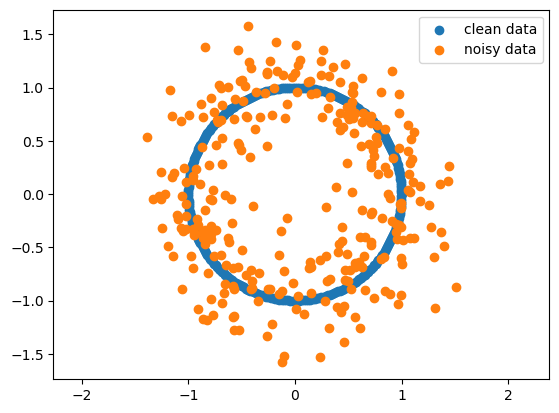

In [9]:
# First point cloud has no noise
N1 = 300
data_clean = np.zeros((N1, 2))
t1 = np.linspace(0, 2*np.pi, N1+1)[0:N1]
data_clean[:, 0] = np.cos(t1)
data_clean[:, 1] = np.sin(t1)

# Second point cloud has a lot of noisy points
N2 = 300
t2 = np.linspace(0, 2*np.pi, N2+1)[0:N2]
data_noisy = np.zeros((N2, 2))
data_noisy[:, 0] = np.cos(t2)
data_noisy[:, 1] = np.sin(t2)
data_noisy = data_noisy + 0.25*np.random.randn(N2, 2)

# Plot the data
plt.scatter(data_clean[:,0], data_clean[:,1], label="clean data")
plt.scatter(data_noisy[:,0], data_noisy[:,1], label="noisy data")
plt.axis('equal')
plt.legend()
plt.show()

Next we compute persistent homology of the clean and noisy data sets and visually inspect their $H_1$ persistence diagrams.

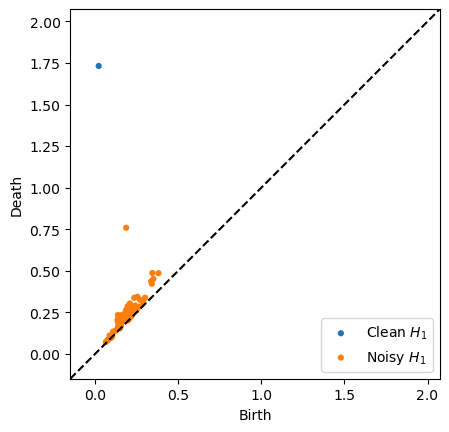

In [13]:
dgm_clean = ripser.ripser(data_clean)['dgms'][1]
dgm_noisy = ripser.ripser(data_noisy)['dgms'][1]

persim.plot_diagrams([dgm_clean, dgm_noisy] , labels=['Clean $H_1$', 'Noisy $H_1$'])
plt.show()

Now compute the bottleneck and Wasserstein distances between these diagrams. (There are some timing commands here to get a feel for how long each takes.)

In [11]:
tic = time.time()
bdist, bmatching = persim.bottleneck(dgm_clean, dgm_noisy, matching=True)
print("Bottleneck distance: " + str(bdist))
print("Elapsed time bottleneck matching: %.3g"%(time.time()-tic))

tic = time.time()
wdist, wmatching = persim.wasserstein(dgm_clean, dgm_noisy, matching=True)
print("Wasserstein distance: " + str(wdist))
print("Elapsed time Wasserstein matching: %.3g"%(time.time()-tic))

Bottleneck distance: 0.8555536037310958
Elapsed time bottleneck matching: 0.0187
Wasserstein distance: 2.834729458088624
Elapsed time Wasserstein matching: 0.00276


Finally, we visualize the matchings.

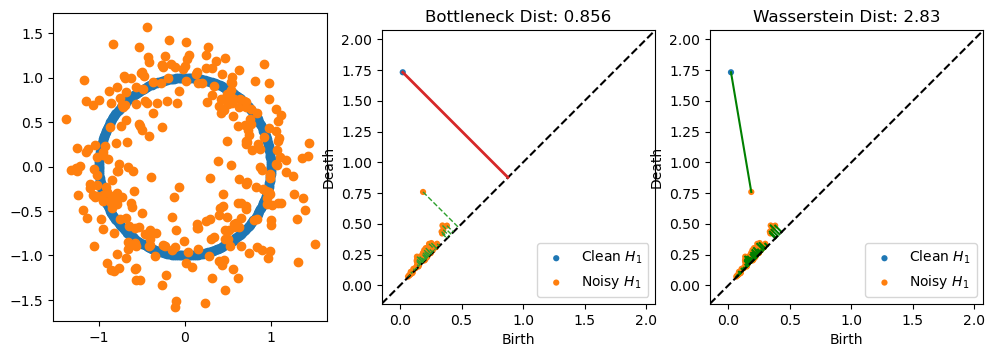

In [12]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(data_clean[:, 0], data_clean[:, 1])
plt.scatter(data_noisy[:, 0], data_noisy[:, 1])
plt.subplot(132)
persim.bottleneck_matching(dgm_clean, dgm_noisy, bmatching, labels=['Clean $H_1$', 'Noisy $H_1$'])
plt.title("Bottleneck Dist: %.3g"%bdist)
plt.subplot(133)
persim.wasserstein_matching(dgm_clean, dgm_noisy, wmatching, labels=['Clean $H_1$', 'Noisy $H_1$'])
plt.title("Wasserstein Dist: %.3g"%wdist)
plt.show()